In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset description:
1. Customer ID: A unique identifier for each customer
2. Surname: The customer's surname or last name
3. Credit Score: A numerical value representing the customer's credit score
4. Geography: The country where the customer resides (France, Spain or Germany)
5. Gender: The customer's gender (Male or Female)
6. Age: The customer's age.
7. Tenure: The number of years the customer has been with the bank
8. Balance: The customer's account balance
9. NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
10. HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
11. IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
12. EstimatedSalary: The estimated salary of the customer
13. Exited: Whether the customer has churned (1 = yes, 0 = no)

In [2]:
df_train = pd.read_csv("data/train.csv")

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Dataset analysis

**Missing values:**  
Fortunately there are no missing values in the dataset.

In [4]:
df_train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Correlations:**  
No strong correlations found

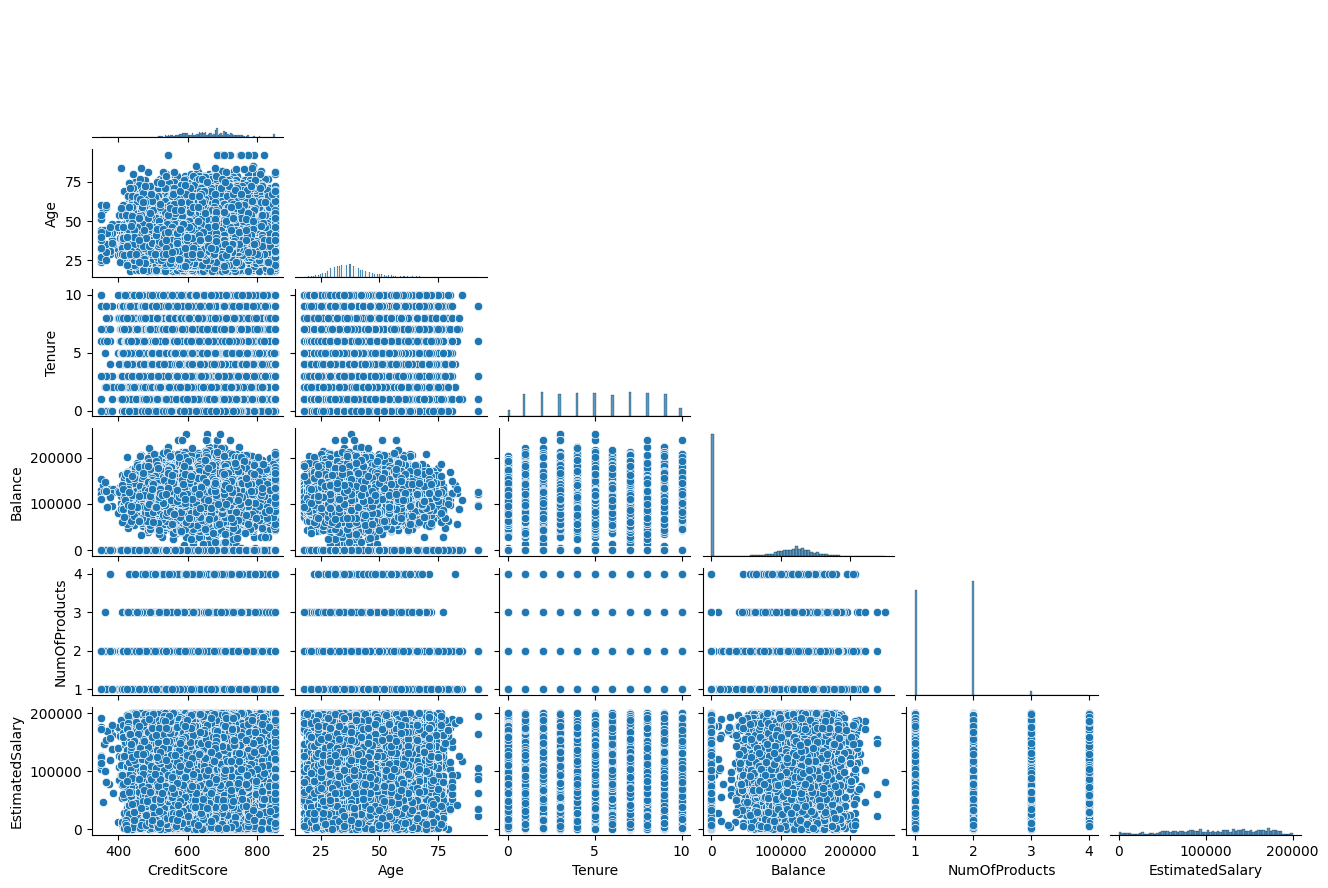

In [5]:
import seaborn as sns

sns.pairplot(df_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']], corner=True, height=1.5, aspect=1.5)

<Axes: >

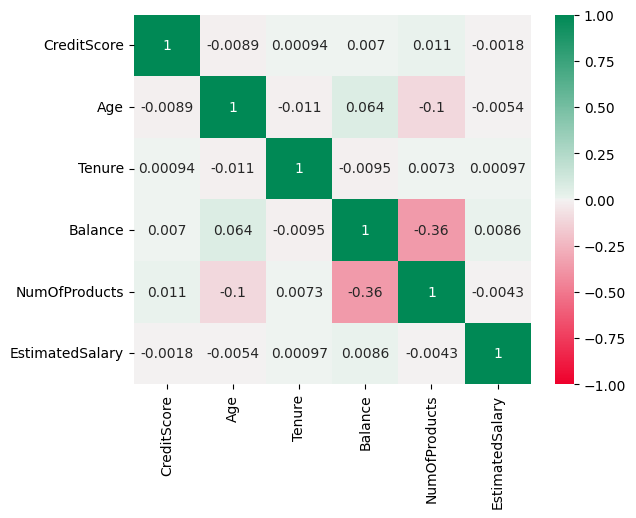

In [6]:
sns.heatmap(
    df_train.loc[:, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].corr(), 
    vmin=-1.0, vmax=1.0, annot=True, cmap=sns.diverging_palette(370, 145, s=100, as_cmap=True)
    )

**CustomerId:**  
The CustomerId column is clearly invalid, as the same id values indicate different customers. Also, based on the problem description I assume that each row indicate different customer.  
Therefore, CustomerId column will not be included.

In [7]:
multiple_customer_ids = df_train.CustomerId.value_counts()[lambda s: s>1].index

df_train. \
    loc[lambda df: df.CustomerId.isin(multiple_customer_ids)]. \
    sort_values("CustomerId"). \
    head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
87277,87277,15565701,Bruno,846,Spain,Male,49.0,8,0.00,2,1.0,1.0,90280.70,0
140882,140882,15565701,Chineze,705,France,Male,32.0,6,107209.58,1,1.0,1.0,129822.79,0
160702,160702,15565701,Ferri,698,France,Female,39.0,2,161993.89,1,1.0,0.0,90212.38,0
93734,93734,15565706,McGregor,564,France,Male,34.0,8,0.00,2,0.0,1.0,53584.03,0
8288,8288,15565706,Akobundu,663,Spain,Male,35.0,4,0.00,1,1.0,1.0,83256.26,1
118192,118192,15565706,Chung,699,Germany,Male,39.0,5,124576.65,2,1.0,0.0,160593.41,0
106193,106193,15565706,Akobundu,682,France,Male,37.0,1,0.00,1,1.0,1.0,83256.26,0
126962,126962,15565714,Davis,697,France,Female,34.0,5,0.00,2,1.0,1.0,79734.23,0
85967,85967,15565714,Cattaneo,601,Spain,Male,47.0,1,64430.06,2,1.0,0.0,96517.97,0
74235,74235,15565714,Yermakov,595,France,Male,38.0,2,152390.25,1,1.0,1.0,87834.24,0


**Surname:**  
Some surnames are more popular than others and they might indicate different descent or ethnicity (there can be distinguished Asian, African, English/American, Italian, Russian names, etc.).  

In [8]:
df_train.Surname.value_counts().head(20)

Surname
Hsia                2456
T'ien               2282
Hs?                 1611
Kao                 1577
Maclean             1577
Ts'ui               1567
P'eng               1503
H?                  1420
Hsueh               1306
Shih                1251
Ch'ang              1229
Ch'iu               1199
Mazzanti            1192
Tuan                1164
Fanucci             1139
Onyemauchechukwu    1138
Tien                1132
Smith               1129
Nwankwo             1117
Manna               1024
Name: count, dtype: int64

After some experimentation, I developed a custom method for inferring descent/ethnicity from surnames. This approach leverages specific letter patterns in surnames that strongly indicate descent. For instance, phrases like 'chukwu', 'nwa', 'kwo' frequently occur in African surnames, while 'zzi', 'cci', 'zza', 'nti' are typically Italian. Similarly 'kov', 'nov', 'sky' are common suffixes in Russian surnames, 'ien', 'eng', 'iu', 'chi' might indicate Asian surnames, and so forth.  

To operationalize this observation I adopted a character-level approach to construct ngrams (experimented with 2-letter and 3-letter ngrams) representing phrases found in surnames. Subsequently, I trained a Word2Vec model to embed these ngrams.  

However, to utilize tree ensemble algorithms, I needed fixed-length embeddings for surnames, which posed a challenge given the varying numbers of embedded phrases. Initially, I explored methods like Doc2vec and averaging of Word2Vec vectors, but the results were unsatisfactory. After further experimentation, I developed an algorithm called TopN Word Movers Distance. Here's a breakdown of the algorithm:

- Calculate Word2Vec embeddings for phrases (ngrams of the word's letters).
- Select the top n most common surnames in the corpus.
- Embed each surname as a vector of Word Movers Distance values between the surname and the top n most common surnames.  

The length of the embedding vector (i.e. the number of most common surnames used), the number of letters in the ngram, and the length of the Word2Vec vecter underwent hyperparameters tuning.

Below is an example illustrating similarities between surnames calculated using this algorithm.

In [9]:
import numpy as np
from itertools import combinations
import nltk
from gensim.models.word2vec import Word2Vec

surnames = df_train.Surname.drop_duplicates().reset_index(drop=True)
surnames_expanded = ["^" + surname + "$" for surname in surnames]

corpus = [tuple(["".join(ngram) for ngram in nltk.ngrams(surname, n=3)]) for surname in surnames_expanded]

w2v_model = Word2Vec(sentences=corpus, vector_size=100, alpha=0.025, window=10, min_count=1)
surname_vectors = [np.mean(np.stack([w2v_model.wv[phrase] for phrase in ngram], axis=1), axis=1) for ngram in corpus]

def wmd_gen():
    for i, j in combinations(range(len(corpus)), 2):
        similarity = w2v_model.wv.wmdistance(corpus[i], corpus[j], False)
        if similarity < 0.1:
            yield surnames[i], surnames[j], similarity

wmd_iter = wmd_gen()
res_wmd = [next(wmd_iter) for _ in range(15000)]
df_res_wmd = pd. \
    DataFrame(res_wmd). \
    rename(columns = {0: "surname_a", 1: "surname_b", 2:"score"}). \
    sort_values(["surname_a", "score"]). \
    groupby("surname_a").head(5)

df_res_wmd

2024-01-29 11:37:23.645626: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 11:37:23.672187: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 11:37:23.672221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 11:37:23.672237: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 11:37:23.679046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

,surname_a,surname_b,score
14049,Ch'ang,Ch'eng,0.040446
13978,Ch'ang,Chuang,0.040509
14847,Ch'ang,Chang,0.042713
13878,Ch'ang,T'ang,0.045433
13868,Ch'ang,Chiang,0.047741
9803,Chiemenam,Chiemeka,0.036922
8577,Chiemenam,Chiemezie,0.037003
8755,Chiemenam,Chiemela,0.037345
9138,Chiemenam,Chiebuka,0.054219
8642,Chiemenam,Chiedozie,0.054591


**CreditScore:**  
CreditScore distribution looks normal. However there's a peek at the end of the distribution. It might be a result of some cap in utilized credit scoring methods (many customers maxed the test) or some trim in the data.  
Therefore, if CreditScore impacts churn, there might be a variety of customers (better and worse in terms of possible churn) with the maximum score.  
This might indicate the need to capture nonlinearity, which suggest using tree-based or neural network algorithms.

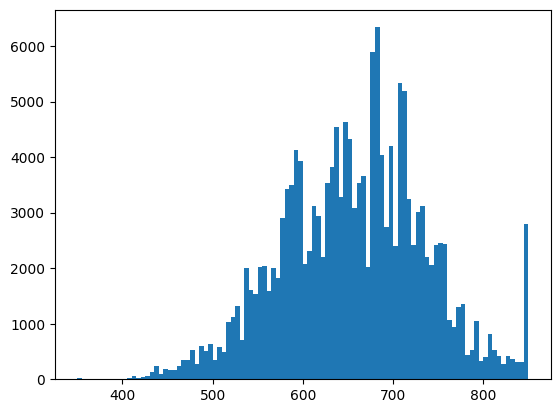

In [10]:
_ = plt.hist(df_train.CreditScore, bins=100)

**Geography and Gender:**  
The Geography and Gender attributes comprise of just a few unique values with balanced numbers of records.  
Therefore, they can be easily OneHotEncoded.  

**Note:**  
While there might be concerns about using Gender, Geography, and Age as model features due to discrimination avoidance, for a task like churn prediction and in the absence of further context on how the predictions will be used, I currently see no reason to conclude that including such attributes might have any unfavorable or discriminative effect on the customers

In [11]:
df_train.Geography.value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [12]:
df_train.Gender.value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

**Age and Tenure:**  
Age distribution looks normal, and Tenure distribution is almost uniform.  
Min and max values (18-92 for Age and 0-10 for Tenure) are consistent with the common sense.

mean    38.125888
std      8.867205
min     18.000000
max     92.000000
Name: Age, dtype: float64

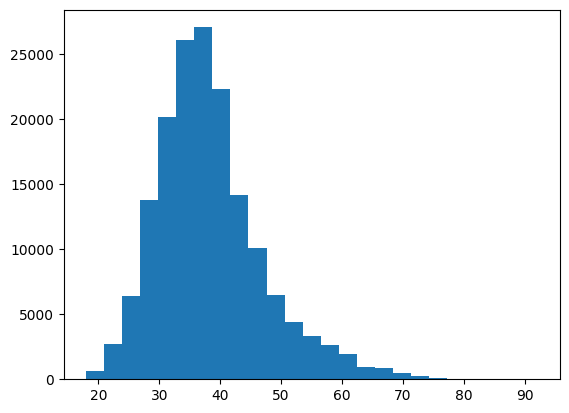

In [13]:
_ = plt.hist(df_train.Age, bins=25)

df_train.Age.describe()[["mean", "std", "min", "max"]]

mean     5.020353
std      2.806159
min      0.000000
max     10.000000
Name: Tenure, dtype: float64

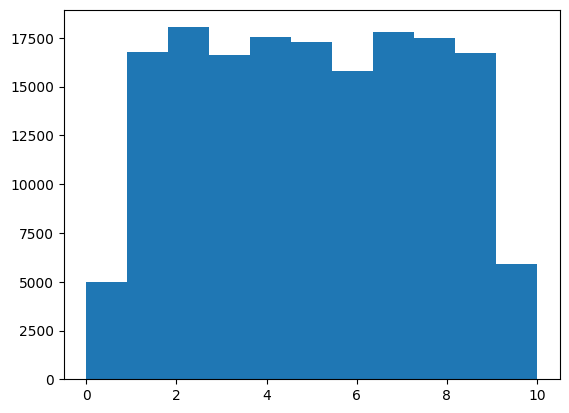

In [14]:
_ = plt.hist(df_train.Tenure, bins=11)

df_train.Tenure.describe()[["mean", "std", "min", "max"]]

**Balance and EstimatedSalary:**  
Balance distribution looks normal, except a large number of balances equal 0.0.  
Tree-based algorithms should be a good choice for this kind of distribution thanks to their ability of applying distinctions like 'Balance <= 0.0 vs. Balance > 0.0'

Both financial features contain only values greater than zero and do not contain any suspicious outliers.

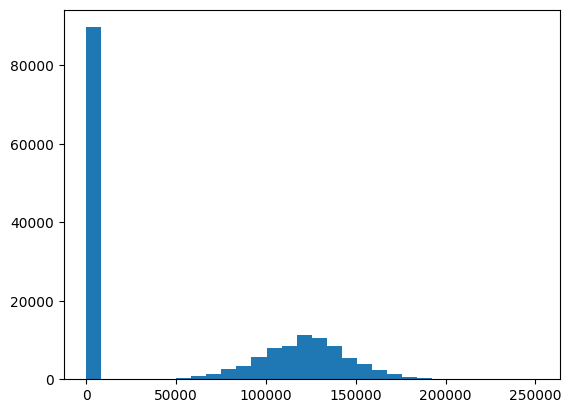

In [15]:
_ = plt.hist(df_train.Balance, bins=30)

mean    112574.822734
std      50292.865585
min         11.580000
max     199992.480000
Name: EstimatedSalary, dtype: float64

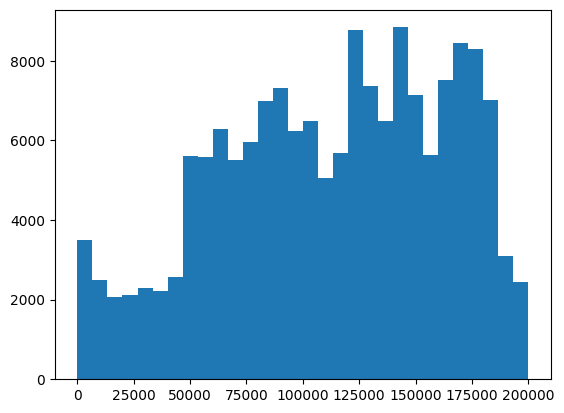

In [16]:
_ = plt.hist(df_train.EstimatedSalary, bins=30)
df_train.EstimatedSalary.describe()[['mean', 'std', 'min', 'max']]

**HasCrCard and IsActiveMember:**

Both the boolean features contain only values 0.0 and 1.0 and are relatively balanced.

In [17]:
df_train.HasCrCard.value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

In [18]:
df_train.IsActiveMember.value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

**Exited:**  
Predicted boolean attribute. Non-churn category is significantly more numerous, nevertheless about 21% of churn records should be enough to conduct modeling.

In [19]:
df_train.Exited.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [20]:
df_train.Exited.value_counts()[1] / df_train.Exited.value_counts().sum()

0.21159882206090866